In [106]:
#Import all the necessary library
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# import warnings
import warnings
warnings.filterwarnings('ignore')


# Read the input file 'NewCleveland.csv using Pandas and check it's column names

In [5]:
# Loading the Data Set
hd=pd.read_csv('NewCleveland.csv')
hd.head()

,63,1,1.1,145,233,1.2,2,150,0,2.3,3,0.1,6,0.2
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [6]:
#Checking the dimensions
hd.shape

(302, 14)

In [7]:
hd.columns

Index(['63', '1', '1.1', '145', '233', '1.2', '2', '150', '0', '2.3', '3',
       '0.1', '6', '0.2'],
      dtype='object')

In [8]:
# Renaming the column names
hd.rename(columns={'63':'Age','1':'Sex','1.1':'ChestPain','145':'trestbps','233':'cholestrol','1.2':'FastingBloodSugar','2':'RestingECG','150':'MaximumHeartRate','0':'ExerciseInducedAngina','2.3':'OldPeak','3':'Slope','0.1':'CA','6':'thal','0.2':'Target'}, inplace=True)

In [9]:
hd.head()

,Age,Sex,ChestPain,trestbps,cholestrol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseInducedAngina,OldPeak,Slope,CA,thal,Target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [ ]:
DESCRIPTION:

Sex: displays the gender of the individual using the following format :
1 = male
0 = female

Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
1 = typical angina
2 = atypical angina
3 = non — anginal pain
4 = asymptotic

Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
If fasting blood sugar > 120mg/dl then : 1 (true)
else : 0 (false)

Resting ECG : displays resting electrocardiographic results
0 = normal
1 = having ST-T wave abnormality
2 = left ventricular hyperthrophy

Max heart rate achieved : displays the max heart rate achieved by an individual.
Exercise induced angina :
1 = yes
0 = no

ST depression induced by exercise relative to rest: displays the value which is an integer or float.
Peak exercise ST segment :
1 = upsloping
2 = flat
3 = downsloping

Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
Thal : displays the thalassemia :
3 = normal
6 = fixed defect
7 = reversible defect

Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
0 = absence
1, 2, 3, 4 = present.

In [135]:
# Check data types and information of dataset

hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    302 non-null    int64  
 1   Sex                    302 non-null    int64  
 2   ChestPain              302 non-null    int64  
 3   trestbps               302 non-null    int64  
 4   cholestrol             302 non-null    int64  
 5   FastingBloodSugar      302 non-null    int64  
 6   RestingECG             302 non-null    int64  
 7   MaximumHeartRate       302 non-null    int64  
 8   ExerciseInducedAngina  302 non-null    int64  
 9   OldPeak                302 non-null    float64
 10  Slope                  302 non-null    int64  
 11  CA                     302 non-null    float64
 12  thal                   302 non-null    float64
 13  Target                 302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


In [180]:
# Checking the null values
ht.isnull().sum()

Age                      0
Sex                      0
ChestPain                0
trestbps                 0
cholestrol               0
FastingBloodSugar        0
RestingECG               0
MaximumHeartRate         0
ExerciseInducedAngina    0
OldPeak                  0
Slope                    0
CA                       0
thal                     0
Target                   0
dtype: int64

<AxesSubplot:>

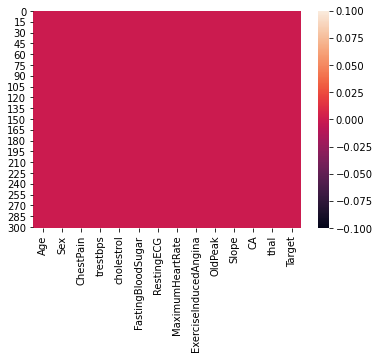

In [181]:
#Visualizaing the null values using heatmap

sns.heatmap(hd.isnull())

# SUMMARY STATISTICS

In [182]:
hd.describe()

,Age,Sex,ChestPain,trestbps,cholestrol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseInducedAngina,OldPeak,Slope,CA,thal,Target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.674497,4.730000,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.931947,1.935102,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# EXPLORING DATA VARIBALES

In [ ]:
# Checking the unique values of the the columns
for columns in hd.columns:
    if hd[columns].dtype==object:
        print(str(columns) + '-' + str(hd[columns].unique()))
        print(hd[columns].value_counts())
        print("******************************************************************************************")

# CORRELATION

In [ ]:
hd_cor=hd.corr()
hd_cor

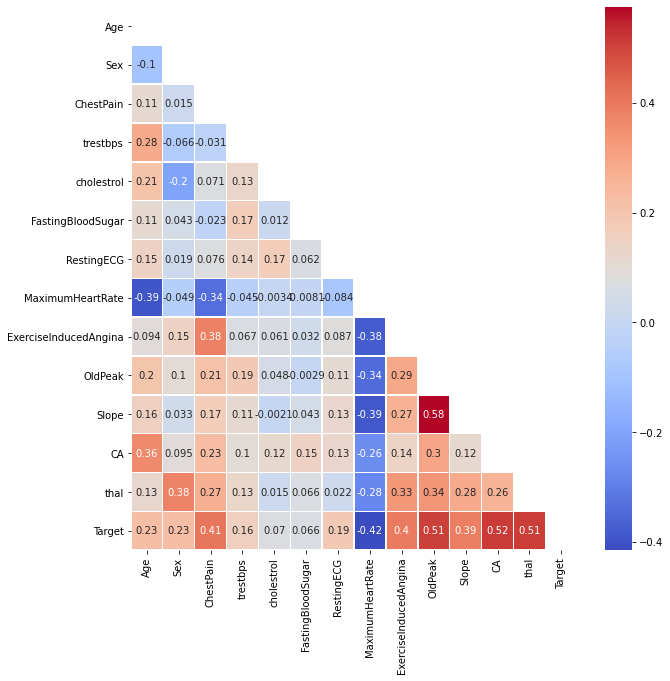

In [143]:
# VISUALIZING CORRELATION BETWEEN THE COLUMNS USING HEATMAP

corr_hmap=hd.corr()
plt.figure(figsize=(10,10))
mask = np.zeros_like(corr_hmap, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(corr_hmap,annot=True, linewidths = .5,cmap = 'coolwarm', mask=mask)
plt.show()



# UNIVARIATE ANALYSIS:

Text(0.5, 1.0, ' CORRELATION WITH TARGET VARIBALES')

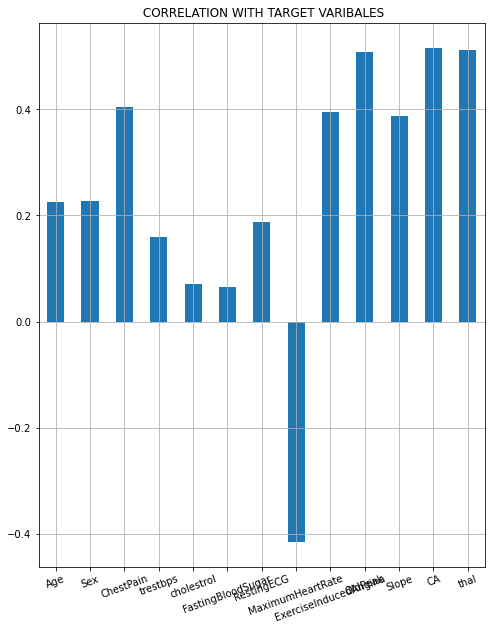

In [185]:
plt.figure(figsize=(8,10))
hd.drop('Target',axis=1).corrwith(hd['Target']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title(" CORRELATION WITH TARGET VARIBALES")

# DATA VISUALIZATION

UNIVARIATE ANALYSIS

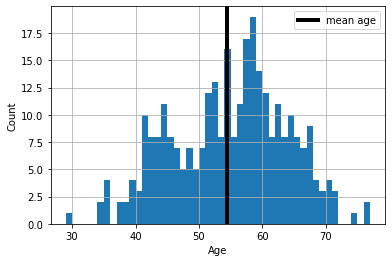

In [186]:
ages=hd['Age'].hist(bins=max(hd['Age']-min(hd['Age'])))
mean_val=np.mean(hd['Age'])
plt.axvline(mean_val,linewidth=4,color='black',label='mean age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()



# HISTOGRAM PLOT FOR CONTINOUS RANDOM VARIABLE

In [187]:
cont_feature={'Age','trestbps', 'cholestrol','MaximumHeartRate','OldPeak'}

In [188]:
list(enumerate(cont_feature))

[(0, 'MaximumHeartRate'),
 (1, 'cholestrol'),
 (2, 'Age'),
 (3, 'trestbps'),
 (4, 'OldPeak')]

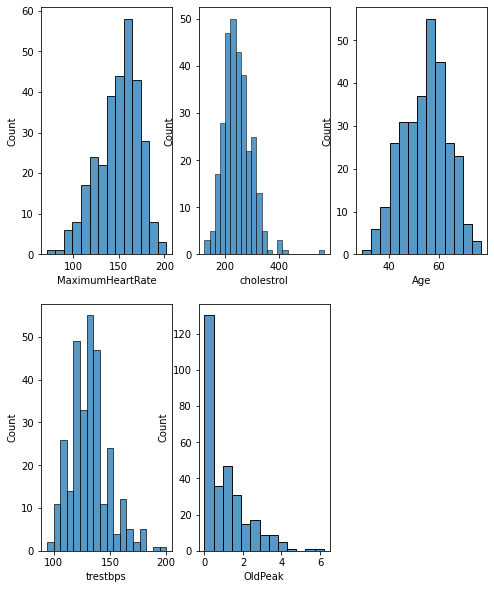

In [189]:
plt.figure(figsize=(8,10))
for i in enumerate(cont_feature):
        plt.subplot(2,3,i[0]+1)
        sns.histplot(x=i[1],data=hd)


In [190]:
hd.columns

Index(['Age', 'Sex', 'ChestPain', 'trestbps', 'cholestrol',
       'FastingBloodSugar', 'RestingECG', 'MaximumHeartRate',
       'ExerciseInducedAngina', 'OldPeak', 'Slope', 'CA', 'thal', 'Target'],
      dtype='object')

# COUNT PLOT ON CATEGORICAL VARIABLES

In [2]:
feature={ 'Sex', 'ChestPain',
       'FastingBloodSugar', 'RestingECG',
       'ExerciseInducedAngina', 'Slope', 'CA', 'thal',}

In [3]:
list(enumerate(feature))

[(0, 'BusinessTravel'),
 (1, 'Department'),
 (2, 'EducationField'),
 (3, 'MaritalStatus'),
 (4, 'Over18'),
 (5, 'OverTime'),
 (6, 'JobRole'),
 (7, 'Attrition'),
 (8, 'Gender')]

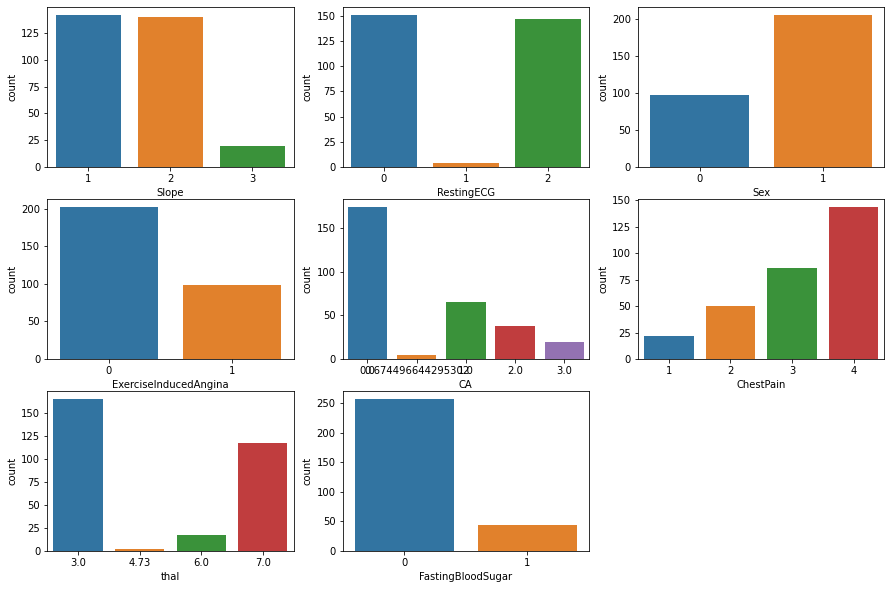

In [193]:
plt.figure(figsize=(15,10))
for i in enumerate(feature):
        plt.subplot(3,3,i[0]+1)
        sns.countplot(i[1],data=hd)
        


# BIVARIATE ANALYSIS

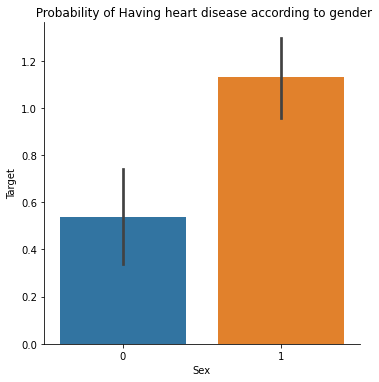

In [156]:
sns.factorplot(x='Sex',y='Target',data=hd,kind='bar',aspect=1)
plt.title(" Probability of Having heart disease according to gender")
plt.show()

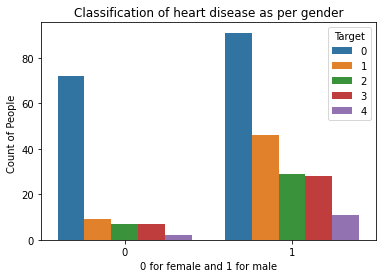

In [157]:
sns.countplot(x='Sex',hue='Target',data=hd)
plt.title('Classification of heart disease as per gender')
plt.xlabel('0 for female and 1 for male')
plt.ylabel('Count of People ')
plt.show()

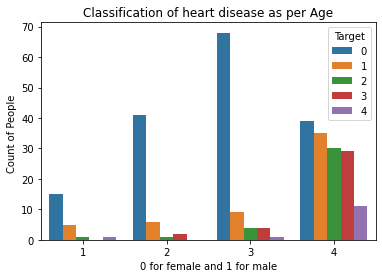

In [158]:
sns.countplot(x='ChestPain',hue='Target',data=hd)
plt.title('Classification of heart disease as per Age')
plt.xlabel('0 for female and 1 for male')
plt.ylabel('Count of People ')
plt.show()

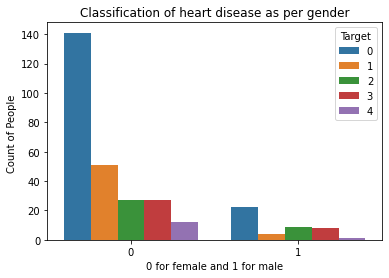

In [159]:
sns.countplot(x='FastingBloodSugar',hue='Target',data=hd)
plt.title('Classification of heart disease as per gender')
plt.xlabel('0 for female and 1 for male')
plt.ylabel('Count of People ')
plt.show()

In [160]:
hd.skew()


Age                     -0.203026
Sex                     -0.769709
ChestPain               -0.845849
trestbps                 0.713008
cholestrol               1.131463
FastingBloodSugar        2.018566
RestingECG               0.026623
MaximumHeartRate        -0.536399
ExerciseInducedAngina    0.737281
OldPeak                  1.281701
Slope                    0.503687
CA                       1.192300
thal                     0.251022
Target                   1.053696
dtype: float64

# PLOTTING OUTLIERS

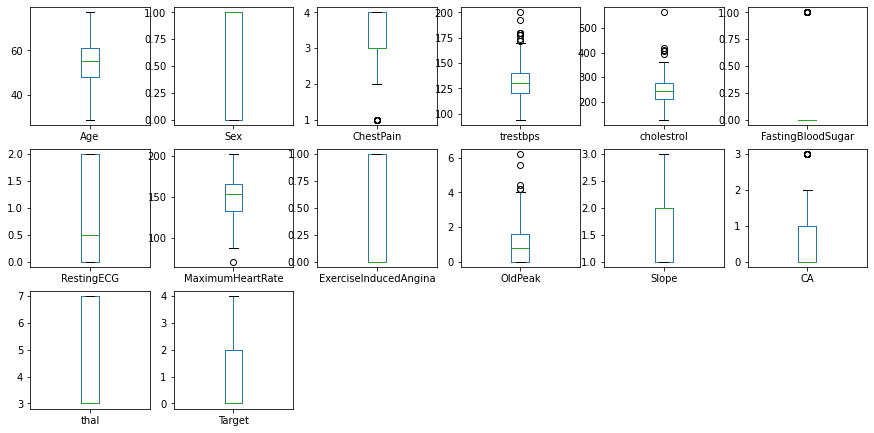

In [161]:
hd.plot(kind='box',subplots=True,layout=(4,6),figsize=(15,10))
plt.show()


In [162]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(hd))
z

array([[1.39491953, 0.68787407, 0.87648065, ..., 2.49945837, 0.89549377,
        0.86332751],
       [1.39491953, 0.68787407, 0.87648065, ..., 1.4246552 , 1.17501206,
        0.04856217],
       [1.92911281, 0.68787407, 0.17390489, ..., 0.72495113, 0.89549377,
        0.76620316],
       ...,
       [0.28690875, 0.68787407, 0.87648065, ..., 0.34985204, 1.17501206,
        1.67809284],
       [0.28690875, 1.45375447, 1.22429043, ..., 0.34985204, 0.89549377,
        0.04856217],
       [1.81831173, 0.68787407, 0.17390489, ..., 0.        , 0.89549377,
        0.76620316]])

In [163]:
threshold=3
print(np.where(z>3))   # no outliers

(array([ 47,  90, 120, 122, 125, 151, 180, 187, 244], dtype=int64), array([4, 9, 4, 9, 3, 4, 4, 3, 7], dtype=int64))


In [164]:
print(z[47][4])
print(z[90][9])
print(z[120][4])



3.2887506976128207
4.456825477631818
3.0955919993341547


In [165]:
#Checking the shape
hd_new=hd[(z<3).all(axis=1)]
print(hd_new.shape,'\t\t',hd.shape)

(293, 14) 		 (302, 14)


# MODEL TRAINING

In [166]:


y=pd.DataFrame(hd_new['Target'])
y.shape


(293, 1)

In [167]:

hd_final=hd_new.drop(columns=['Target'])
hd_final.shape

(293, 13)

In [168]:
#Scaling input varibales

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(hd_final)
x=pd.DataFrame(x,columns=hd_final.columns)



In [169]:
#splitting the data into train and test data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
                                              
                                              


In [170]:
#Checking shape 
print(x_train.shape,'\t\t',x_test.shape)

(196, 13) 		 (97, 13)


In [171]:
print(y_train.shape,'\t\t',y_test.shape)

(196, 1) 		 (97, 1)


In [172]:
#IMPORTING LIBRARY
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [173]:
# USING ALL THE RELATED CLASSIFIERS TO TRAIN OUR MODEL AND CHECKING THE ACCURACY PARAMETERES
model=[SVC(),KNeighborsClassifier(),DecisionTreeClassifier
from sklearn.ensemble imnTreeClassifier(),GaussianNB(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'-',m.score(x_train,y_train))
    pred=m.predict(x_test)
    print("ERROR:")
    
    # CHECKING ALL THE PARAMETERS OF THE CLASSIFIER FOR EVALUATION
    print('Accuracy score of',m,'is:',accuracy_score(y_test,pred))
    print('Confusion Matrix of',m,'is:',confusion_matrix(y_test,pred))
    print('Classification report of',m,'is:',classification_report(y_test,pred))
    print("*********************************************************************")
    print('\n')

SyntaxError: invalid syntax (<ipython-input-173-8f8678c5a5f0>, line 3)

In [ ]:
# GRID SEARCH TO FIND BEST PARAMETERS OF SVC CLASSIFIER

from sklearn.model_selection import GridSearchCV
param={'kernel':('linear','poly','rbf')
           ,'degree':[3,8]
           ,'gamma':('auto','scale')
           ,'coef0':[0,0.001,0.01,0.1,0.5,1,10]
            ,'C':[1,10,20,30,40]
           }


In [ ]:
# FINDING BEST PARAMETERS OF SVC CLASSIFIER

model=SVC()
grid=GridSearchCV(model,param,cv=5)
grid.fit(x_train,y_train)

In [ ]:
# BEST PARAMETERS OF SVC AFTER GRID SEARCH
grid.best_estimator_

In [ ]:
# CHECKING BEST SCORE OF SVC
grid.best_score_

In [ ]:
# APPLYING BEST PARAMETERS TO SVC TO GET BETTER ACCURACY

SVC_model=SVC(C=1, coef0=0, gamma='auto', kernel='linear')
SVC_model.fit(x_train,y_train)
print('Score of',SVC_model,'-',SVC_model.score(x_train,y_train))
pred=SVC_model.predict(x_test)
print("ERROR")
print('Accuracy score of',SVC_model,'is:',accuracy_score(y_test,pred))
print('Confusion Matrix of',SVC_model,'is:',confusion_matrix(y_test,pred))
print('Classification report of',SVC_model,'is:',classification_report(y_test,pred))
print("*********************************************************************")
print('\n')

# USING ENSEMBLE TECHNIQUE TO BOOST OUR SCORE

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier


# USING ALL THE BOOSTING ALGORITHM IN LOOP:

model_new=[AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model_new:
    m.fit(x_train,y_train)
    print('Score of',m,'-',m.score(x_train,y_train))
    pred=m.predict(x_test)
    print("ERROR:")
    
    # CHECKING ALL THE PARAMETERS OF THE CLASSIFIER FOR EVALUATION
    print('Accuracy score of',m,'is:',accuracy_score(y_test,pred))
    print('Confusion Matrix of',m,'is:',confusion_matrix(y_test,pred))
    print('Classification report of',m,'is:',classification_report(y_test,pred))
    print("*********************************************************************")
    print('\n')

# SVC CLASSIFIER WITH BEST ACCURACY AMONG ALL THE MODELS:

In [ ]:
m2=SVC(probability=True)
m2.fit(x_train,y_train)
print('Score of',m2,'-',m2.score(x_train,y_train))
pred=m2.predict(x_test)
print("ERROR:")
 
print('Accuracy score of',m2,'is:',accuracy_score(y_test,pred))
print('Confusion Matrix of',m2,'is:',confusion_matrix(y_test,pred))
print('Classification report of',m2,'is:',classification_report(y_test,pred))
print("*********************************************************************")
print('\n')

In [ ]:
#PLOTTING CONFUSION MATRIX OF SVC CLASSIFIER

con=confusion_matrix(y_test,pred)
sns.heatmap(con,annot=True,cbar=False,cmap='Greens')
plt.title("CONFUSION MATRIX OF SVC CLASSIFIER")
plt.show()

AUC_ROC CURVE AND AUC SCORE

In [174]:

y_pred_prob=m2.predict_proba(x_test)[:,1]



In [175]:
y_pred_prob

array([0.15251341, 0.40552236, 0.14247166, 0.10529768, 0.13570717,
       0.22600851, 0.23075956, 0.18637919, 0.29536436, 0.1074373 ,
       0.33480753, 0.12671353, 0.15532803, 0.10865936, 0.13650113,
       0.36955305, 0.34688853, 0.15477743, 0.11719125, 0.13320573,
       0.322268  , 0.32245944, 0.16134721, 0.22298094, 0.12917571,
       0.12858827, 0.29157128, 0.11635129, 0.28824867, 0.14886201,
       0.07249689, 0.24800942, 0.09080167, 0.17141839, 0.20364216,
       0.2670244 , 0.28063095, 0.07897146, 0.17593915, 0.24909588,
       0.43886365, 0.22849328, 0.17981839, 0.30884852, 0.12174474,
       0.1396712 , 0.23078026, 0.12633271, 0.28893309, 0.10784923,
       0.18641189, 0.1372998 , 0.10771676, 0.14126068, 0.09583438,
       0.14677787, 0.19530072, 0.36225054, 0.21982577, 0.16077487,
       0.12945169, 0.27891116, 0.11042222, 0.12721444, 0.29630104,
       0.15174883, 0.20009869, 0.12530189, 0.11137793, 0.4546291 ,
       0.19369916, 0.15086485, 0.14723955, 0.10875547, 0.16610

In [176]:
roc_auc_score(y_test,y_pred_prob,multi_class="ovr")


AxisError: axis 1 is out of bounds for array of dimension 1

In [177]:
import sklearn
sklearn.__version__

'0.23.2'

In [132]:
fpr,tpr=roc_curve(y_test,y_pred_prob)



ValueError: multiclass format is not supported